### Time to get your hands dirty! Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process:

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks
- In the above example, experiment with chopping off different numbers of initial points as burn-in.

In [6]:
# MARKOV CHAIN: knowing how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy)
# I want to demonstrate in the end that P(clear) = 0.83 and P(cloudy) = 0.17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [ ]:
Pr_R = 0.5 # probability tomorrow rainy -> today rainy
Pr_S = 0.5 # probability tomorrow sunny ->  today rainy
Ps_R = 0.1 # probability tomorrow rainy -> today sunny
Ps_S = 0.9 # probability tomorrow sunny -> today sunny

# How many day with that weather I have
SUNNY = 0 # sunny day = 1
RAINY = 0 # rainy day = 0
DAYS = []

# First day is RAINY
W = 0 # weather flag
N = 100000 # number of days

for i in range(N):
    p = np.random.uniform(0,1)

    if (W == 0): # today is RAINY
        if (p <= Pr_R): # tomorrow is RAINY
            RAINY += 1
            DAYS.append(0)

        else: # tomorrow is SUNNY
            SUNNY += 1
            DAYS.append(1)
            W = 1

    else: # today is SUNNY
        if (p <= Ps_R): # tomorrow is RAINY
            RAINY += 1
            DAYS.append(0)
            W = 0
        else: # tomorrow is SUNNY
            SUNNY += 1 
            DAYS.append(1)
            
print("probability of RAINY days: ", RAINY/N)
print("probability of SUNNY days: ", SUNNY/N)

probability of RAINY days:  0.16735
probability of SUNNY days:  0.83265


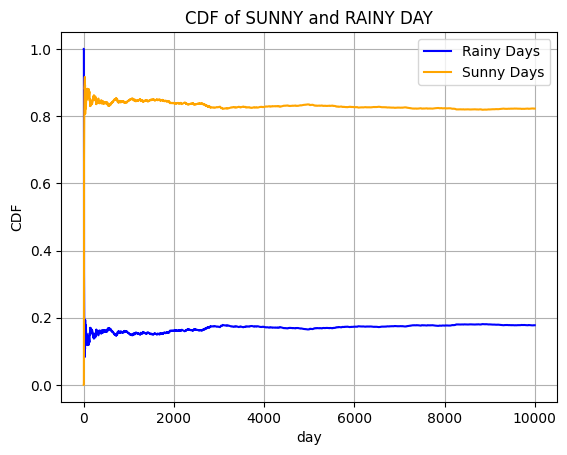

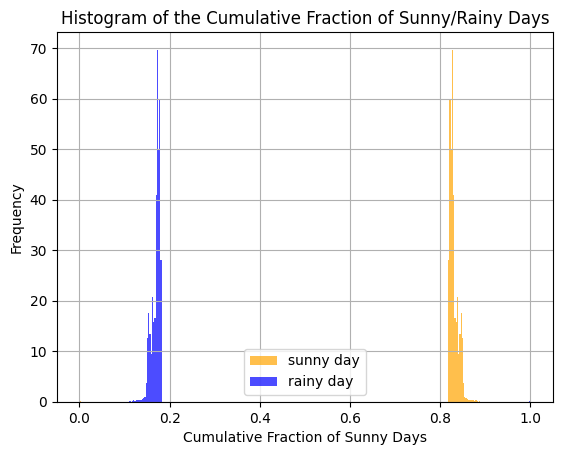


SUNNY PROBABILITY: Mean: 0.8300 +- Standard Deviation: 0.0165
RAINY PROBABILITY: Mean: 0.1700 +- Standard Deviation: 0.0165


In [9]:
# plot CDF vs days 
def CDF_sunny (day, DAYS):
    n = 0
    for i in range (day):
        if DAYS[i] == 1:
            n += 1

    return n/day

def CDF_rainy(day, DAYS):
    n = 0
    for i in range (day):
        if DAYS[i] == 0:
            n += 1

    return n/day

num = 10000
x = np.arange(1, N + 1)

prob_rainy = []
prob_sunny = []

for i in range(1, num+1):  
    prob_rainy.append(CDF_rainy(i, DAYS))
    prob_sunny.append(CDF_sunny(i, DAYS))


plt.plot(np.arange(1, num+1), prob_rainy, label='Rainy Days', color='blue')
plt.plot(np.arange(1, num+1), prob_sunny, label='Sunny Days', color='orange')

plt.title("CDF of SUNNY and RAINY DAY")
plt.xlabel("day")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of the cumulative fraction of sunny days
plt.hist(prob_sunny, bins=int(len(prob_sunny)/30), alpha=0.7, color='orange', label='sunny day', density = True)
plt.hist(prob_rainy, bins=int(len(prob_rainy)/30), alpha=0.7, color='blue', label = 'rainy day', density=True)

plt.title('Histogram of the Cumulative Fraction of Sunny/Rainy Days')
plt.xlabel('Cumulative Fraction of Sunny Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Summary statistics to determine the most likely value and an error on our estimate.
mean_sunny_fraction = np.mean(prob_sunny)
std_sunny_fraction = np.std(prob_sunny)

mean_rainy_fraction = np.mean(prob_rainy)
std_rainy_fraction = np.std(prob_rainy)

print()
print(f"SUNNY PROBABILITY: Mean: {mean_sunny_fraction:.4f} +- Standard Deviation: {std_sunny_fraction:.4f}")
print(f"RAINY PROBABILITY: Mean: {mean_rainy_fraction:.4f} +- Standard Deviation: {std_rainy_fraction:.4f}")

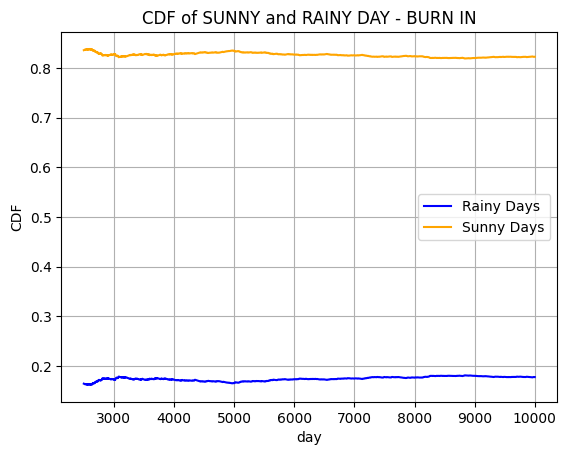

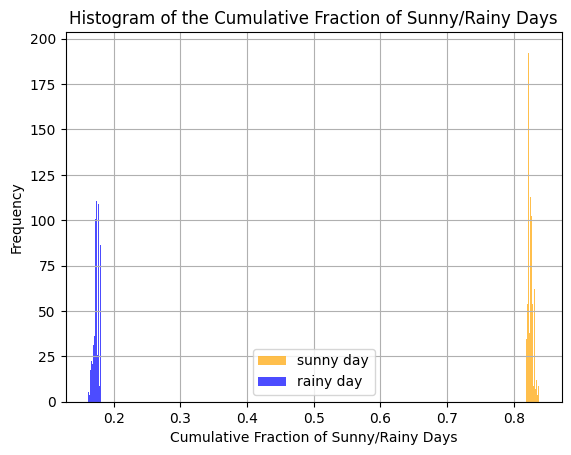


SUNNY PROBABILITY (burn_in): Mean: 0.8258 +- Standard Deviation: 0.0041
RAINY PROBABILITY (burn_in): Mean: 0.1742 +- Standard Deviation: 0.0041


In [10]:
# Burn-in cut 
burn_in = 2500
NEWsunny = prob_sunny[burn_in:]
NEWrainy = prob_rainy[burn_in:]

plt.plot(np.arange(burn_in, num),  NEWrainy, label='Rainy Days', color='blue')
plt.plot(np.arange(burn_in, num),  NEWsunny, label='Sunny Days', color='orange')

plt.title("CDF of SUNNY and RAINY DAY - BURN IN")
plt.xlabel("day")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of the cumulative fraction of sunny days
plt.hist(NEWsunny, bins=int(len(NEWsunny)/30), alpha=0.7, color='orange', label='sunny day', density = True)
plt.hist(NEWrainy, bins=int(len(NEWrainy)/30), alpha=0.7, color='blue', label = 'rainy day', density=True)

plt.title('Histogram of the Cumulative Fraction of Sunny/Rainy Days')
plt.xlabel('Cumulative Fraction of Sunny/Rainy Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.show()

# Summary statistics to determine the most likely value and an error on our estimate.
NEWmean_sunny_fraction = np.mean(NEWsunny)
NEWstd_sunny_fraction = np.std(NEWsunny)

NEWmean_rainy_fraction = np.mean(NEWrainy)
NEWstd_rainy_fraction = np.std(NEWrainy)

print()
print(f"SUNNY PROBABILITY (burn_in): Mean: {NEWmean_sunny_fraction:.4f} +- Standard Deviation: {NEWstd_sunny_fraction:.4f}")
print(f"RAINY PROBABILITY (burn_in): Mean: {NEWmean_rainy_fraction:.4f} +- Standard Deviation: {NEWstd_rainy_fraction:.4f}")